In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import seaborn as sns

In [ ]:
# Upload and load dataset
uploaded = files.upload()
df = pd.read_csv("Mall_Customers.csv")
df.sample(5)

Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
5,6,Female,22,17,76
183,184,Female,29,98,88
123,124,Male,39,69,91
102,103,Male,67,62,59
32,33,Male,53,33,4


In [ ]:
# Encode categorical column 'Genre'
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [ ]:
# Normalize numerical features
scaler = MinMaxScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

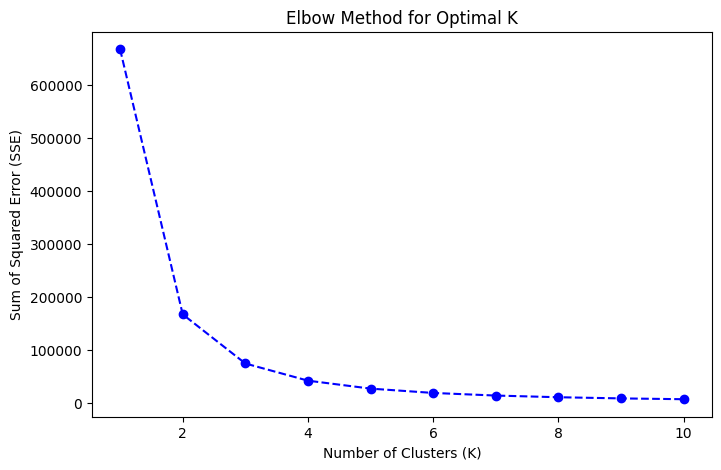

In [ ]:
# Compute SSE for the elbow method
sse = []
k_rng = range(1, 11)

for k in k_rng:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=12)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_rng, sse, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# Apply KMeans Clustering
optimal_k = 5  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=12)
df['Cluster'] = kmeans.fit_predict(df)

Silhouette Score: 0.549


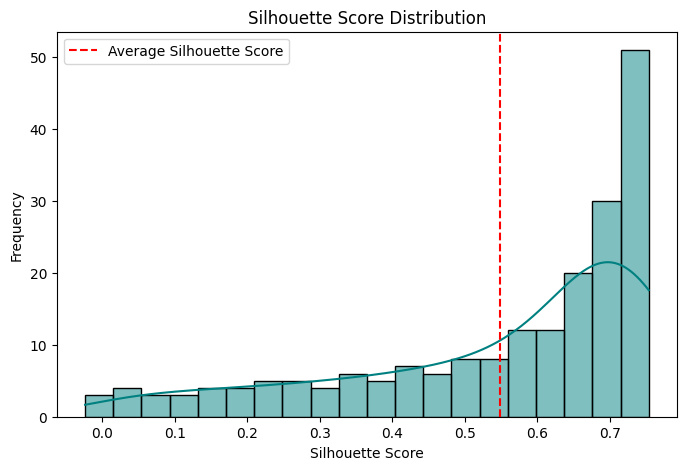

In [ ]:

# Compute Silhouette Score
silhouette_avg = silhouette_score(df.drop(columns=['Cluster']), df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Silhouette Analysis Graph
plt.figure(figsize=(8, 5))
silhouette_values = silhouette_samples(df.drop(columns=['Cluster']), df['Cluster'])
sns.histplot(silhouette_values, kde=True, bins=20, color="teal")
plt.axvline(x=silhouette_avg, color='r', linestyle='dashed', label='Average Silhouette Score')
plt.title("Silhouette Score Distribution")
plt.xlabel("Silhouette Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

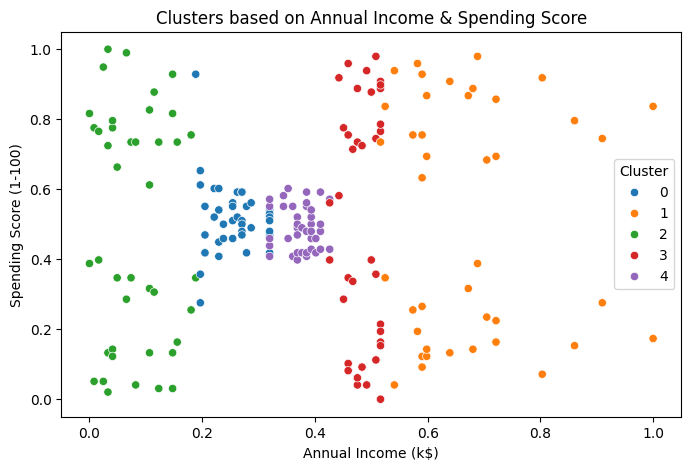

In [ ]:
# Scatter plot for visualization (Annual Income vs Spending Score)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title('Clusters based on Annual Income & Spending Score')
plt.show()